In [1]:
from nltk.corpus import PlaintextCorpusReader
wordlists = PlaintextCorpusReader("Nepali_Corpus", '.*')

In [2]:
texts,invalid = [],0
for i in wordlists.fileids():
    try:
        if i == ".ipynb_checkpoints/Project-checkpoint.ipynb" or i == "Log":
            continue
        texts.append(wordlists.raw(i).replace("\ufeff",""))

    except UnicodeDecodeError:
        invalid+=1


In [85]:
print(len(texts),invalid)

14135 227


In [86]:
import re
##Split in text
paragraph = list()
for text in texts:
    raw = re.split(r"\n|\r",text.strip())
    if len(text) > 0 or not re.match('(\s)+',text): 
        paragraph.extend(raw)


In [87]:
#paragraph

In [123]:
#Split Into Sentences
pura_sents = []
for i in paragraph:
    
    pura_sents.extend(re.split(r'(?<=।)\s',i))


In [124]:
sents = []
for i in pura_sents:
    sents.extend(re.split(r'(?<=\?)\s',i))
#sents

In [125]:
#Split Into Words
tokenized_sents = []
for i in sents:
    tok_sent = [j for j in  re.split(r"\s+|\t+|[-(),।/'–’“‘]|\"‘|\.+|[०१२३४५६७८९]+",i) if len(j)>0]
    tokenized_sents.append(tok_sent)


In [126]:
#tokenized_sents

In [127]:
vocab = set()
total = []
for i in tokenized_sents:
    vocab.update(i)
    total.extend(i)

print(len(tokenized_sents))
print(len(vocab))


341545
240339


In [128]:
from nltk import FreqDist
a = FreqDist(total)
a.most_common()

[('छ', 71674),
 ('र', 69253),
 ('पनि', 43447),
 ('छन्', 29361),
 ('भएको', 25111),
 ('भने', 22990),
 ('हो', 22894),
 ('गरेको', 22595),
 ('लागि', 20184),
 ('गर्न', 19013),
 ('गर्ने', 18731),
 ('थियो', 16630),
 ('तर', 15678),
 ('तथा', 15153),
 ('यो', 15041),
 ('उनले', 14829),
 ('नै', 13891),
 ('गरेका', 11611),
 ('एक', 11484),
 ('थिए', 11422),
 ('हुने', 11275),
 ('रहेको', 10699),
 ('नेपाल', 10438),
 ('?', 9895),
 ('बताए', 9693),
 ('भन्ने', 9174),
 ('काम', 8724),
 ('छैन', 8042),
 ('गरिएको', 7912),
 ('गर्दै', 7898),
 ('नेपाली', 7865),
 ('गरी', 7778),
 ('अध्यक्ष', 7294),
 ('त', 7219),
 ('केही', 7167),
 ('समेत', 7045),
 ('हुन्छ', 6769),
 ('अहिले', 6749),
 ('गरे', 6669),
 ('आफ्नो', 6667),
 ('नयाँ', 6662),
 ('भएका', 6656),
 ('हुन', 6648),
 ('कुरा', 6596),
 ('हजार', 6591),
 ('हुन्', 6435),
 ('कारण', 6344),
 ('कुनै', 6181),
 ('रुपमा', 6112),
 ('जानकारी', 6001),
 ('भन्दै', 5965),
 ('गरेर', 5943),
 ('काठमाडौं', 5934),
 ('दुई', 5892),
 ('मात्र', 5571),
 ('सरकारले', 5559),
 ('दिन', 5541),
 ('के', 5389

In [129]:
with open("text_dump","w") as text_dump:
    for i in a.most_common():
        text_dump.write(i[0]+"-------"+ str(i[1]))
        text_dump.write("\n")
text_dump.close()
print("Dump Completed")

Dump Completed


Dump Completed


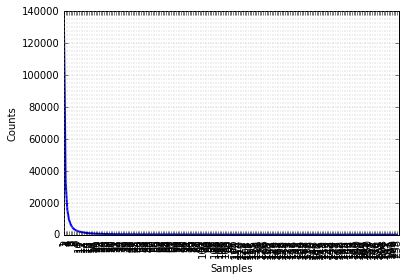

In [138]:
frequency_analysis = [i[1] for i in a.most_common()]
frequency = FreqDist(frequency_analysis)
frequency.most_common()

with open("frequency_dump","w") as text_dump:
    for i in a.most_common():
        text_dump.write(i[0]+"-------"+ str(i[1]))
        text_dump.write("\n")
text_dump.close()
print("Dump Completed")
frequency.plot(200)